In [2]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks

In [3]:
df  = pd.read_csv('/Users/bianca/Documents/Itau-Analise-de-Credito/Inputs/credit_analysis_data.csv')

In [4]:
df.shape

(1000, 14)

In [5]:
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,PhD,Employed,Married,5,Rent,28,20629,1
1,69,53051,16003,54,312,0,Bachelor,Employed,Single,1,Mortgage,12,41678,0
2,46,38654,22246,48,683,3,Bachelor,Employed,Married,3,Own,7,20467,0
3,32,28666,29325,26,698,1,Bachelor,Employed,Married,1,Own,21,39952,0
4,60,40301,5816,39,318,2,PhD,Employed,Single,3,Own,20,29884,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1000 non-null   int64 
 1   Income                1000 non-null   int64 
 2   Loan Amount           1000 non-null   int64 
 3   Loan Term             1000 non-null   int64 
 4   Credit Score          1000 non-null   int64 
 5   Number of Defaults    1000 non-null   int64 
 6   Education Level       1000 non-null   object
 7   Employment Status     1000 non-null   object
 8   Marital Status        1000 non-null   object
 9   Number of Dependents  1000 non-null   int64 
 10  Home Ownership        1000 non-null   object
 11  Years in Residence    1000 non-null   int64 
 12  Annual Expenses       1000 non-null   int64 
 13  Default Probability   1000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 109.5+ KB


In [7]:
df.describe()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Number of Dependents,Years in Residence,Annual Expenses,Default Probability
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.81900,50863.121000,20203.059000,35.661000,578.81400,2.006000,2.548000,14.777000,30039.377000,0.197000
std,14.99103,14823.257362,9809.574573,13.686248,158.33446,1.418441,1.710152,8.606587,9864.135905,0.397931
min,18.00000,6556.000000,-10195.000000,12.000000,300.00000,0.000000,0.000000,0.000000,-2173.000000,0.000000
25%,31.00000,40822.250000,13585.000000,24.000000,443.00000,1.000000,1.000000,7.000000,22985.000000,0.000000
50%,44.00000,50807.000000,20038.000000,35.000000,582.00000,2.000000,3.000000,15.000000,30190.000000,0.000000
75%,56.00000,60281.750000,26842.000000,48.000000,722.00000,3.000000,4.000000,23.000000,36921.750000,0.000000
max,69.00000,89485.000000,51931.000000,59.000000,849.00000,4.000000,5.000000,29.000000,57345.000000,1.000000


In [8]:
#Verifica se há valores nulos
df.isnull().sum()

Age                     0
Income                  0
Loan Amount             0
Loan Term               0
Credit Score            0
Number of Defaults      0
Education Level         0
Employment Status       0
Marital Status          0
Number of Dependents    0
Home Ownership          0
Years in Residence      0
Annual Expenses         0
Default Probability     0
dtype: int64

In [9]:
#Verifica se há duplicados
df.duplicated().sum()

0

In [10]:
#Verifica quantos valores distintos há em cada coluna
df.nunique()

Age                      52
Income                  994
Loan Amount             987
Loan Term                48
Credit Score            458
Number of Defaults        5
Education Level           4
Employment Status         3
Marital Status            4
Number of Dependents      6
Home Ownership            3
Years in Residence       30
Annual Expenses         988
Default Probability       2
dtype: int64

In [11]:
# verifica o balanceamento das classes
#Conclusão: classe desbalanceada. 

df['Default Probability'].value_counts()

0    803
1    197
Name: Default Probability, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
#Agrupando dados idade 
bins = [18, 28, 38, 48 , 58, 69 ]
labels = ['18-28', '29-38', '39-48', '49-58', '59-69']
df['Idade'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [14]:
#Agrupando dados renda 
bins = [ 6556, 10000, 20000, 30000 , 40000, 50000,60000,70000,80000,90000 ]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil', '0-70 mil', '0-80 mil', '0-90 mil']
df['Renda'] = pd.cut(df['Income'], bins=bins, labels=labels)

In [15]:
#Agrupando dados valor do emprestimo 
bins = [-11000, 10000, 20000, 30000 , 40000, 50000,60000]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil']
df['valor_emprestimo'] = pd.cut(df['Loan Amount'], bins=bins, labels=labels)

In [16]:
#Agrupando dados prazo do emprestimo 
bins = [12, 24, 36, 48 , 60]
labels = ['12-24', '25-36', '37-48', '48-60']
df['prazo_pag'] = pd.cut(df['Loan Term'], bins=bins, labels=labels)

In [17]:
#Agrupando dados score 
bins = [0, 300, 600, 900 ]
labels = ['0-300', '300-600', '600-900']
df['pontos_credito'] = pd.cut(df['Credit Score'], bins=bins, labels=labels)

In [18]:
#Agrupando dados anos de residencia 
bins = [0, 5, 10, 15 , 20, 25, 30 ]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
df['anos_residencia'] = pd.cut(df['Years in Residence'], bins=bins, labels=labels)

In [19]:
#Agrupando dados anos de residencia 
bins = [-3000, 0, 10000, 20000 , 30000, 40000, 50000, 60000 ]
labels = ['neg-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['gasto_anual'] = pd.cut(df['Annual Expenses'], bins=bins, labels=labels)

In [20]:
#Transformação de Variáveris categóricas em numérica
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status']) 
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership']) 
df['Idade'] = label_encoder.fit_transform(df['Idade']) 
df['Renda'] = label_encoder.fit_transform(df['Renda'])
df['valor_emprestimo'] = label_encoder.fit_transform(df['valor_emprestimo'])
df['prazo_pag'] = label_encoder.fit_transform(df['prazo_pag'])
df['pontos_credito'] = label_encoder.fit_transform(df['pontos_credito'])
df['anos_residencia'] = label_encoder.fit_transform(df['anos_residencia'])
df['gasto_anual'] = label_encoder.fit_transform(df['gasto_anual'])


In [21]:
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,...,Years in Residence,Annual Expenses,Default Probability,Idade,Renda,valor_emprestimo,prazo_pag,pontos_credito,anos_residencia,gasto_anual
0,56,25903,37269,47,761,3,3,0,1,5,...,28,20629,1,3,2,3,2,2,4,2
1,69,53051,16003,54,312,0,0,0,2,1,...,12,41678,0,4,5,1,3,1,1,4
2,46,38654,22246,48,683,3,0,0,1,3,...,7,20467,0,2,3,2,2,2,5,2
3,32,28666,29325,26,698,1,0,0,1,1,...,21,39952,0,1,2,2,1,2,3,3
4,60,40301,5816,39,318,2,3,0,2,3,...,20,29884,0,4,4,0,2,1,2,2


## Analise Exploratoria

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
correlations = df.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma

# Criar um DataFrame com as correlações e ordenar em ordem crescente
correlation_df = pd.DataFrame(correlations)
correlation_df.columns = ['correlation']
correlation_df = correlation_df.sort_values(by='correlation', ascending=True)

In [24]:
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20, 20)})

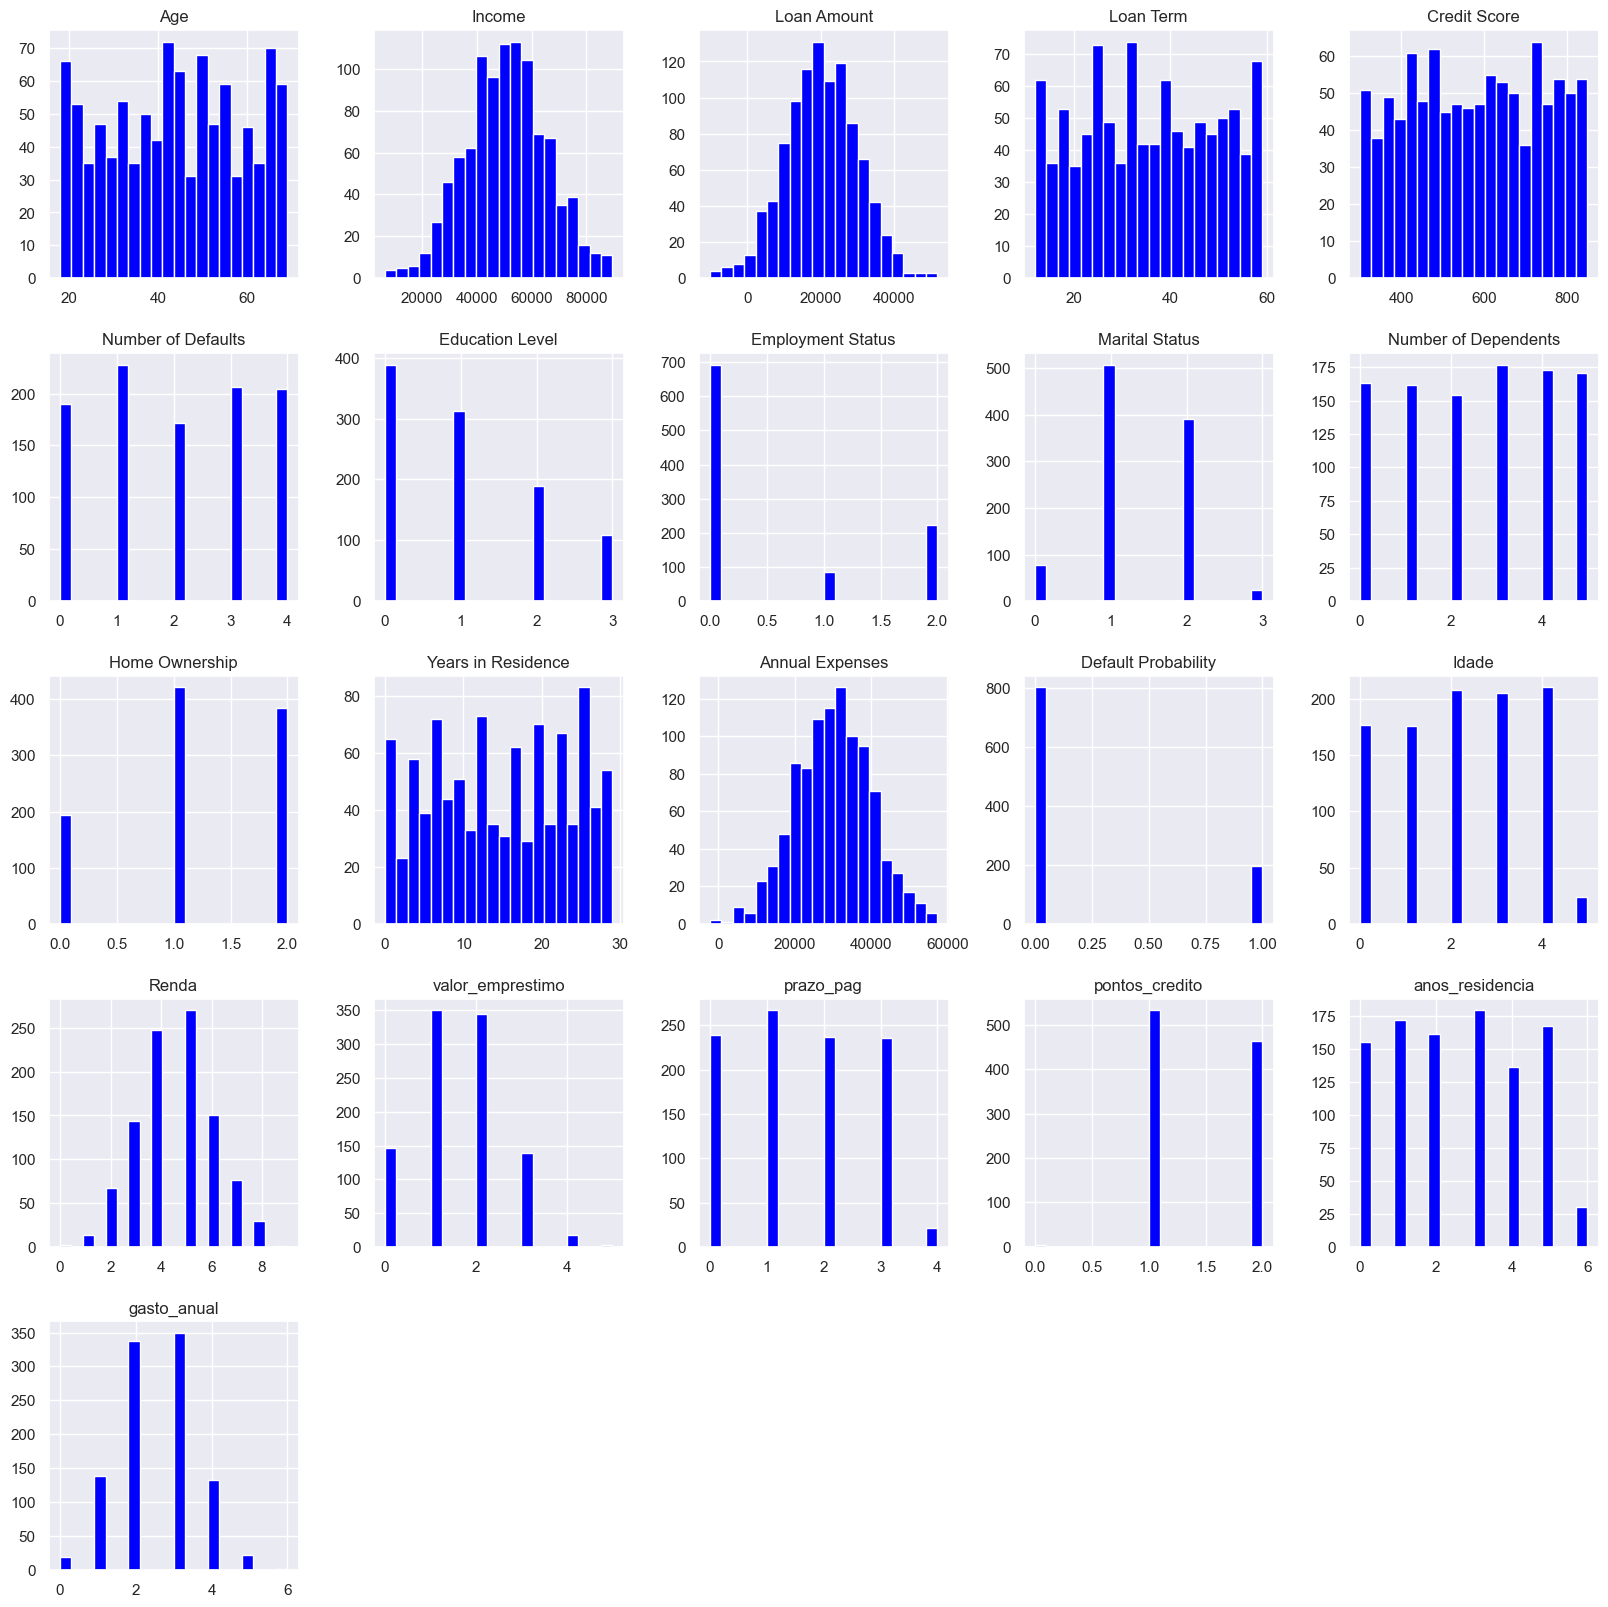

In [25]:
eixo = df.hist(bins=20, color='blue')
plt.show()

## Separação classe e atributos

In [26]:
# Seleção de features
col_relevancia = [    'Home Ownership', 'Education Level', 'Marital Status','Income']
relevancia_col = df[col_relevancia]

In [27]:
X = df.iloc[:, 0:12].values
#X = relevancia_col.iloc[:, 0:6].values
X.shape

(1000, 12)

In [28]:
y = df.iloc[:, 13].values
#y = df_encoded.iloc[:, 19].values
y.shape

(1000,)

## Baleanceamento das classes

In [29]:
# Método de undersampling - Tomek links
tl = TomekLinks(sampling_strategy = 'auto')
X_tl, y_tl = tl.fit_resample(X,y)

In [30]:
np.unique(y_tl, return_counts=True)

(array([0, 1], dtype=int64), array([704, 197], dtype=int64))

In [31]:
# Método de oversampling - SMOTE
from imblearn.over_sampling import SMOTE

In [32]:

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tl, y_tl)

In [35]:
np.unique(y_smote, return_counts=True)

(array([0, 1], dtype=int64), array([704, 704], dtype=int64))

## TREINAMENTO DO MODELO 

Sem Balanceamento

In [36]:
from catboost import CatBoostClassifier

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [38]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [39]:
x_train.shape, x_test.shape

((800, 12), (200, 12))

In [41]:
# Treinando modelo com dados desbalanceados
cat = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=10,  
                           verbose=100)
cat.fit(x_train, y_train)


0:	learn: 0.6374557	total: 184ms	remaining: 3m 3s
100:	learn: 0.0450464	total: 3.62s	remaining: 32.2s
200:	learn: 0.0178246	total: 6.67s	remaining: 26.5s
300:	learn: 0.0104980	total: 9.76s	remaining: 22.7s
400:	learn: 0.0072653	total: 12.8s	remaining: 19.1s
500:	learn: 0.0053976	total: 15.9s	remaining: 15.8s
600:	learn: 0.0043263	total: 19s	remaining: 12.6s
700:	learn: 0.0036127	total: 22.1s	remaining: 9.41s
800:	learn: 0.0030897	total: 25.4s	remaining: 6.31s
900:	learn: 0.0027153	total: 28.8s	remaining: 3.16s
999:	learn: 0.0024090	total: 31.7s	remaining: 0us


In [42]:
# Aplicando previsões aos dados de teste
y_pred = cat.predict(x_test)


In [43]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)


Acurácia: 0.8
Matriz de Confusão:
 [[160   3]
 [ 37   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       163
           1       0.00      0.00      0.00        37

    accuracy                           0.80       200
   macro avg       0.41      0.49      0.44       200
weighted avg       0.66      0.80      0.72       200



## TREINAMENTO DO MODELO TOMEK LINK

In [46]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_tl,y_tl, test_size= 0.2)

In [47]:
cat = CatBoostClassifier(iterations=1000, 
                           learning_rate=0.1, 
                           depth=10,  
                           verbose=100)
cat.fit(x_train, y_train)

0:	learn: 0.6413102	total: 47.1ms	remaining: 47.1s
100:	learn: 0.0460440	total: 3.61s	remaining: 32.2s
200:	learn: 0.0181587	total: 7s	remaining: 27.8s
300:	learn: 0.0105234	total: 10s	remaining: 23.2s
400:	learn: 0.0072040	total: 13.5s	remaining: 20.1s
500:	learn: 0.0055286	total: 16.7s	remaining: 16.6s
600:	learn: 0.0044243	total: 19.8s	remaining: 13.1s
700:	learn: 0.0036727	total: 22.9s	remaining: 9.78s
800:	learn: 0.0031389	total: 26s	remaining: 6.47s
900:	learn: 0.0027400	total: 29s	remaining: 3.19s
999:	learn: 0.0024297	total: 32.2s	remaining: 0us


In [48]:
y_pred_tl = cat.predict(x_test)

In [49]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_tl)
conf_matrix = confusion_matrix(y_test, y_pred_tl)
class_report = classification_report(y_test, y_pred_tl)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.7734806629834254
Matriz de Confusão:
 [[140   6]
 [ 35   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       146
           1       0.00      0.00      0.00        35

    accuracy                           0.77       181
   macro avg       0.40      0.48      0.44       181
weighted avg       0.65      0.77      0.70       181



## TREINAMENTO SMOTE

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [51]:
# Dividindo bases de treino e teste
seed = 10
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size= 0.3, random_state=seed)

In [52]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
cat = CatBoostClassifier(border_count= 32, depth= 6, iterations= 300, l2_leaf_reg= 3, learning_rate= 0.05)
cat.fit(x_train, y_train)

0:	learn: 0.6834491	total: 6.43ms	remaining: 1.92s
1:	learn: 0.6756756	total: 21.1ms	remaining: 3.14s
2:	learn: 0.6670655	total: 26.6ms	remaining: 2.63s
3:	learn: 0.6585755	total: 40.9ms	remaining: 3.03s
4:	learn: 0.6511481	total: 47.1ms	remaining: 2.78s
5:	learn: 0.6433306	total: 52.6ms	remaining: 2.58s
6:	learn: 0.6365626	total: 57.8ms	remaining: 2.42s
7:	learn: 0.6308564	total: 62.4ms	remaining: 2.28s
8:	learn: 0.6241040	total: 72.1ms	remaining: 2.33s
9:	learn: 0.6184087	total: 76.9ms	remaining: 2.23s
10:	learn: 0.6133177	total: 83.7ms	remaining: 2.2s
11:	learn: 0.6089018	total: 89.9ms	remaining: 2.16s
12:	learn: 0.6022854	total: 94.5ms	remaining: 2.09s
13:	learn: 0.5952952	total: 102ms	remaining: 2.07s
14:	learn: 0.5904002	total: 106ms	remaining: 2.02s
15:	learn: 0.5863527	total: 127ms	remaining: 2.26s
16:	learn: 0.5797771	total: 138ms	remaining: 2.29s
17:	learn: 0.5750366	total: 142ms	remaining: 2.23s
18:	learn: 0.5711415	total: 149ms	remaining: 2.2s
19:	learn: 0.5669514	total: 16

In [64]:
y_pred_smote = cat.predict(x_test)

In [65]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_smote)
conf_matrix = confusion_matrix(y_test, y_pred_smote)
class_report = classification_report(y_test, y_pred_smote)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.8226950354609929
Matriz de Confusão:
 [[166  44]
 [ 31 182]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       210
           1       0.81      0.85      0.83       213

    accuracy                           0.82       423
   macro avg       0.82      0.82      0.82       423
weighted avg       0.82      0.82      0.82       423



In [56]:
'''
(todas col )max_depth=8, min_samples_split=15:  69%
(4 col )max_depth=8, min_samples_split=15:  69%


'''

'\n(todas col )max_depth=8, min_samples_split=15:  69%\n(4 col )max_depth=8, min_samples_split=15:  69%\n\n\n'

## AJUSTE DE HIPERPARAMETROS

In [57]:
from sklearn.model_selection import GridSearchCV

In [60]:
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'border_count': [32, 64, 128]
}


In [61]:
grid_search = GridSearchCV(cat, param_grid, cv=5, scoring='precision')
grid_search.fit(x_train, y_train)

0:	learn: 0.6920429	total: 1.5ms	remaining: 149ms
99:	learn: 0.6255626	total: 126ms	remaining: 0us
0:	learn: 0.6919141	total: 1.87ms	remaining: 185ms
99:	learn: 0.6198154	total: 183ms	remaining: 0us
0:	learn: 0.6920780	total: 1.19ms	remaining: 118ms
99:	learn: 0.6256072	total: 164ms	remaining: 0us
0:	learn: 0.6922762	total: 1.18ms	remaining: 117ms
99:	learn: 0.6322877	total: 110ms	remaining: 0us
0:	learn: 0.6921061	total: 1.54ms	remaining: 153ms
99:	learn: 0.6268214	total: 164ms	remaining: 0us
0:	learn: 0.6877336	total: 1.32ms	remaining: 131ms
99:	learn: 0.5187488	total: 226ms	remaining: 0us
0:	learn: 0.6870918	total: 1.7ms	remaining: 169ms
99:	learn: 0.5072340	total: 194ms	remaining: 0us
0:	learn: 0.6878969	total: 1.62ms	remaining: 160ms
99:	learn: 0.5259275	total: 175ms	remaining: 0us
0:	learn: 0.6888662	total: 1.16ms	remaining: 114ms
99:	learn: 0.5227648	total: 146ms	remaining: 0us
0:	learn: 0.6880303	total: 1.15ms	remaining: 114ms
99:	learn: 0.5171149	total: 106ms	remaining: 0us
0:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000002C83C9A71D0>,
             param_grid={'border_count': [32, 64, 128], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'l2_leaf_reg': [1, 3, 5, 7],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='precision')

In [62]:
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'border_count': 32, 'depth': 6, 'iterations': 300, 'l2_leaf_reg': 3, 'learning_rate': 0.05}
